{Cell author(s): Kathleen Reece}


**Question**
What are the best predictors of SAT scores?

The first step is to get data. From the CORGIS dataset project, we'll use the School Scores CSV file, containing information about average SAT scores by state from 2005 to 2015. The first step is to read in the data and store it in a Pandas dataframe:

In [3]:
# Cell author(s): Kathleen Reece
import pandas
sat_data = pandas.read_csv("../data/school_scores.csv")

{Cell author(s): Kathleen Reece}

We take a look at the first few rows of the data to get a sense of what, if any, cleaning we need to do

In [5]:
# Cell author(s): Kathleen Reece
sat_data.head()

,Year,State.Code,State.Name,Total.Math,Total.Test-takers,Total.Verbal,Academic Subjects.Arts/Music.Average GPA,Academic Subjects.Arts/Music.Average Years,Academic Subjects.English.Average GPA,Academic Subjects.English.Average Years,...,Score Ranges.Between 600 to 700.Math.Total,Score Ranges.Between 600 to 700.Verbal.Females,Score Ranges.Between 600 to 700.Verbal.Males,Score Ranges.Between 600 to 700.Verbal.Total,Score Ranges.Between 700 to 800.Math.Females,Score Ranges.Between 700 to 800.Math.Males,Score Ranges.Between 700 to 800.Math.Total,Score Ranges.Between 700 to 800.Verbal.Females,Score Ranges.Between 700 to 800.Verbal.Males,Score Ranges.Between 700 to 800.Verbal.Total
0,2005,AL,Alabama,559,3985,567,3.92,2.2,3.53,3.9,...,1096,596,613,1209,156,292,448,219,250,469
1,2005,AK,Alaska,519,3996,523,3.76,1.9,3.35,3.9,...,787,423,375,798,47,116,163,109,115,224
2,2005,AZ,Arizona,530,18184,526,3.85,2.1,3.45,3.9,...,3814,1831,1679,3510,327,630,957,412,501,913
3,2005,AR,Arkansas,552,1600,563,3.90,2.2,3.61,4.0,...,443,242,226,468,49,83,132,77,93,170
4,2005,CA,California,522,186552,504,3.76,1.8,3.32,3.8,...,37605,16078,14966,31044,5451,8792,14243,5011,4766,9777


In [6]:
# Cell author(s): Kathleen Reece
sat_data["State.Name"].nunique()

53

In [7]:
# Cell author(s): Kathleen Reece
sat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 99 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Year                                                     577 non-null    int64  
 1   State.Code                                               577 non-null    object 
 2   State.Name                                               577 non-null    object 
 3   Total.Math                                               577 non-null    int64  
 4   Total.Test-takers                                        577 non-null    int64  
 5   Total.Verbal                                             577 non-null    int64  
 6   Academic Subjects.Arts/Music.Average GPA                 577 non-null    float64
 7   Academic Subjects.Arts/Music.Average Years               577 non-null    float64
 8   Academic Subjects.English.Aver

{Cell author(s): Kathleen Reece}

We can learn a few things from just looking at this data:
1. The data is broken down by the math and verbal scores
2. This data is highly broken down by demographics (family income, GPA, score range)
3. This data is already very clean.

Because the data is so broken down, we first want to transform the data to focus on the total SAT scores. To find a good approximation of this, we can take sum of the average math and the verbal scores. A casuality of this decision is that we can't really look at score ranges for total scores, since it's possible a student could have scores that fall in two different ranges.

In [9]:
# Cell author(s): Kathleen Reece
total_sat_data = sat_data[["Year", "State.Code", "State.Name", "Total.Test-takers"]].copy()
total_sat_data["Total.Overall"] = sat_data["Total.Math"] + sat_data["Total.Verbal"]
'''
Uncomment if you want overall SAT scores for any of these buckets
total_sat_data["Family Income.Between 20-40k.Overall"] = (sat_data["Family Income.Between 20-40k.Math"] 
+ sat_data["Family Income.Between 20-40k.Verbal"])
total_sat_data["Family Income.Between 40-60k.Overall"] = (sat_data["Family Income.Between 40-60k.Math"] 
+ sat_data["Family Income.Between 40-60k.Verbal"])
total_sat_data["Family Income.Between 60-80k.Overall"] = (sat_data["Family Income.Between 60-80k.Math"] 
+ sat_data["Family Income.Between 60-80k.Verbal"])
total_sat_data["Family Income.Between 80-100k.Overall"] = (sat_data["Family Income.Between 80-100k.Math"] 
+ sat_data["Family Income.Between 80-100k.Verbal"])
total_sat_data["Family Income.Less than 20k.Overall"] = (sat_data["Family Income.Less than 20k.Math"] 
+ sat_data["Family Income.Less than 20k.Verbal"])
total_sat_data["Family Income.More than 100k.Overall"] = (sat_data["Family Income.More than 100k.Math"] 
+ sat_data["Family Income.More than 100k.Verbal"])
total_sat_data["GPA.A minus.Overall"] = sat_data["GPA.A minus.Math"] + sat_data["GPA.A minus.Verbal"]
total_sat_data["GPA.A plus.Overall"] = sat_data["GPA.A plus.Math"] + sat_data["GPA.A plus.Verbal"]
total_sat_data["GPA.A.Overall"] = sat_data["GPA.A.Math"] + sat_data["GPA.A.Verbal"]
total_sat_data["GPA.B.Overall"] = sat_data["GPA.B.Math"] + sat_data["GPA.B.Verbal"]
total_sat_data["GPA.C.Overall"] = sat_data["GPA.C.Math"] + sat_data["GPA.C.Verbal"]
total_sat_data["GPA.D or lower.Overall"] = sat_data["GPA.D or lower.Math"] + sat_data["GPA.D or lower.Verbal"]
total_sat_data["GPA.No response.Overall"] = sat_data["GPA.No response.Math"] + sat_data["GPA.No response.Verbal"]
total_sat_data["Gender.Female.Overall"] = sat_data["Gender.Female.Math"] + sat_data["Gender.Female.Verbal"]
total_sat_data["Gender.Male.Overall"] = sat_data["Gender.Male.Math"] + sat_data["Gender.Male.Verbal"]
'''
total_sat_data.head()

,Year,State.Code,State.Name,Total.Test-takers,Total.Overall
0,2005,AL,Alabama,3985,1126
1,2005,AK,Alaska,3996,1042
2,2005,AZ,Arizona,18184,1056
3,2005,AR,Arkansas,1600,1115
4,2005,CA,California,186552,1026


{Cell author(s): Kathleen Reece}

We can also notice that some states have a lot more test takers than others. Thus, we can also normalize by total number of test takers to get propertions of a state's test takers within family income brackets, GPA levels, and genders.

In [11]:
# Cell author(s): Kathleen Reece
total_test_takers = sat_data["Total.Test-takers"]
total_sat_data["Family Income.Less than 20k.Relative-test-takers"] = sat_data["Family Income.Less than 20k.Test-takers"]/total_test_takers
total_sat_data["Family Income.Between 20-40k.Relative-test-takers"] = sat_data["Family Income.Between 20-40k.Test-takers"]/total_test_takers
total_sat_data["Family Income.Between 40-60k.Relative-test-takers"] = sat_data["Family Income.Between 40-60k.Test-takers"]/total_test_takers
total_sat_data["Family Income.Between 60-80k.Relative-test-takers"] = sat_data["Family Income.Between 60-80k.Test-takers"]/total_test_takers
total_sat_data["Family Income.Between 80-100k.Relative-test-takers"] = sat_data["Family Income.Between 80-100k.Test-takers"]/total_test_takers
total_sat_data["Family Income.More than 100k.Relative-test-takers"] = sat_data["Family Income.More than 100k.Test-takers"]/total_test_takers
total_sat_data["GPA.A plus.Relative-test-takers"] = sat_data["GPA.A plus.Test-takers"]/total_test_takers
total_sat_data["GPA.A minus.Relative-test-takers"] = sat_data["GPA.A minus.Test-takers"]/total_test_takers
total_sat_data["GPA.A.Relative-test-takers"] = sat_data["GPA.A.Test-takers"]/total_test_takers
total_sat_data["GPA.B.Relative-test-takers"] = sat_data["GPA.B.Test-takers"]/total_test_takers
total_sat_data["GPA.C.Relative-test-takers"] = sat_data["GPA.C.Test-takers"]/total_test_takers         
total_sat_data["GPA.D or lower.Relative-test-takers"] = sat_data["GPA.D or lower.Test-takers"]/total_test_takers
total_sat_data["GPA.No response.Relative-test-takers"] = sat_data["GPA.No response.Test-takers"]/total_test_takers
total_sat_data["Gender.Female.Relative-test-takers"] = sat_data["Gender.Female.Test-takers"]/total_test_takers
total_sat_data["Gender.Male.Relative-test-takers"] = sat_data["Gender.Male.Test-takers"]/total_test_takers
total_sat_data.head()

,Year,State.Code,State.Name,Total.Test-takers,Total.Overall,Family Income.Less than 20k.Relative-test-takers,Family Income.Between 20-40k.Relative-test-takers,Family Income.Between 40-60k.Relative-test-takers,Family Income.Between 60-80k.Relative-test-takers,Family Income.Between 80-100k.Relative-test-takers,Family Income.More than 100k.Relative-test-takers,GPA.A plus.Relative-test-takers,GPA.A minus.Relative-test-takers,GPA.A.Relative-test-takers,GPA.B.Relative-test-takers,GPA.C.Relative-test-takers,GPA.D or lower.Relative-test-takers,GPA.No response.Relative-test-takers,Gender.Female.Relative-test-takers,Gender.Male.Relative-test-takers
0,2005,AL,Alabama,3985,1126,0.043915,0.081305,0.110916,0.118695,0.119197,0.245922,0.141280,0.181681,0.258971,0.314429,0.047177,0.000000,0.056462,0.519950,0.480050
1,2005,AK,Alaska,3996,1042,0.047798,0.100350,0.134885,0.150901,0.111111,0.135135,0.043293,0.168418,0.167918,0.405906,0.104605,0.003003,0.106857,0.540791,0.459209
2,2005,AZ,Arizona,18184,1056,0.048999,0.116641,0.124835,0.130444,0.102618,0.169545,0.092609,0.183348,0.211945,0.395568,0.065112,0.000880,0.050539,0.539265,0.460735
3,2005,AR,Arkansas,1600,1115,0.066875,0.112500,0.153125,0.141875,0.091875,0.196250,0.170625,0.186250,0.285625,0.273125,0.035625,0.000000,0.048750,0.536875,0.463125
4,2005,CA,California,186552,1026,0.103580,0.140234,0.098348,0.096150,0.075689,0.150006,0.040214,0.163735,0.136938,0.453809,0.100985,0.001287,0.103033,0.551825,0.448175


In [12]:
total_sat_data.max()

Year                                                      2015
State.Code                                                  WY
State.Name                                             Wyoming
Total.Test-takers                                       241553
Total.Overall                                             1230
Family Income.Less than 20k.Relative-test-takers      0.813549
Family Income.Between 20-40k.Relative-test-takers     1.592926
Family Income.Between 40-60k.Relative-test-takers     1.764688
Family Income.Between 60-80k.Relative-test-takers     1.846823
Family Income.Between 80-100k.Relative-test-takers    1.398681
Family Income.More than 100k.Relative-test-takers      2.42446
GPA.A plus.Relative-test-takers                       0.669964
GPA.A minus.Relative-test-takers                      2.145384
GPA.A.Relative-test-takers                            2.115108
GPA.B.Relative-test-takers                            6.141787
GPA.C.Relative-test-takers                            2

{Cell author(s): Kathleen Reece}

This transformed data provides a number of possible predictors of SAT score: the distributions of family income, GPA, and gender of the test takers, along with the total number of test takers in a state. We can explore these possible predictors through linear regession.

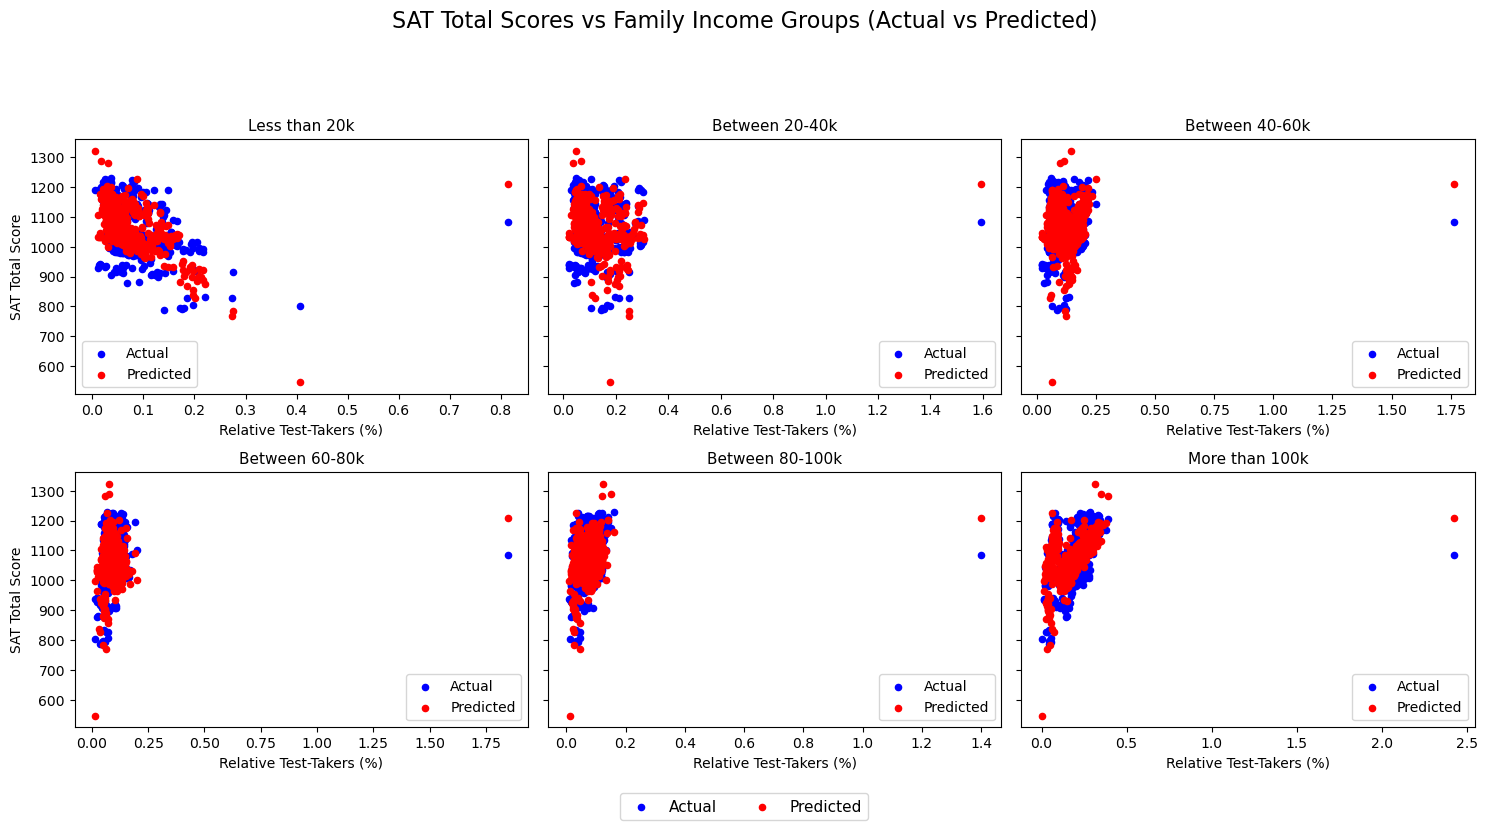

In [14]:
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt

total_sat_data = total_sat_data.rename(columns={"Total.Overall": "total_overall"})
income_dist = total_sat_data[["Family Income.Less than 20k.Relative-test-takers", "Family Income.Between 20-40k.Relative-test-takers", 
                "Family Income.Between 40-60k.Relative-test-takers", "Family Income.Between 60-80k.Relative-test-takers",
               "Family Income.Between 80-100k.Relative-test-takers", "Family Income.More than 100k.Relative-test-takers"]]
score_series = total_sat_data.total_overall
income_scores_model = LinearRegression().fit(income_dist, score_series)
total_sat_data["Predicted_Scores_by_Income"] = income_scores_model.predict(income_dist)
#ax = total_sat_data.plot.scatter(x='Family Income.Less than 20k.Relative-test-takers', y='total_overall', color='blue', label='Actual')
#total_sat_data.plot.scatter(x='Family Income.Less than 20k.Relative-test-takers', y='Predicted_Scores_by_Income', ax=ax, color='red', label='Predicted')
x_axes = [
    "Family Income.Less than 20k.Relative-test-takers",
    "Family Income.Between 20-40k.Relative-test-takers",
    "Family Income.Between 40-60k.Relative-test-takers",
    "Family Income.Between 60-80k.Relative-test-takers",
    "Family Income.Between 80-100k.Relative-test-takers",
    "Family Income.More than 100k.Relative-test-takers"
]

# Create a 2x3 grid with shared y-axis
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)
axes = axes.flatten()

# Plot each subplot
for i, x_col in enumerate(x_axes):
    ax = axes[i]
    total_sat_data.plot.scatter(
        x=x_col, y="total_overall", color="blue", label="Actual", ax=ax
    )
    total_sat_data.plot.scatter(
        x=x_col, y="Predicted_Scores_by_Income", color="red", label="Predicted", ax=ax
    )

    # Format titles/labels
    ax.set_title(
        x_col.replace("Family Income.", "").replace(".Relative-test-takers", ""),
        fontsize=11
    )
    ax.set_xlabel("Relative Test-Takers (%)")
    if i % 3 == 0:  # only first column gets y-label
        ax.set_ylabel("SAT Total Score")
    else:
        ax.set_ylabel("")

# Add one shared legend (using handles/labels from the first axis)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=2, fontsize=11)

# Add a main title
fig.suptitle("SAT Total Scores vs Family Income Groups (Actual vs Predicted)", fontsize=16, y=1.02)

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # leave space at bottom for legend
plt.show()
